# Load the Data

In [1]:
import pandas as pd
import zipfile
import os

# Function to load CSV from a ZIP file with multiple files
def load_csv_from_zip(zip_path, csv_filename):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Extract and read the specific CSV file
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

# Define the relative path to the datasets folder
datasets_path = os.path.join('..', 'Datasets')

# Load datasets from zipped CSV files specifying the correct CSV filenames
df_ca = load_csv_from_zip(os.path.join(datasets_path, 'CAvideos.csv.zip'), 'CAvideos.csv')
df_de = load_csv_from_zip(os.path.join(datasets_path, 'DEvideos.csv.zip'), 'DEvideos.csv')
df_fr = load_csv_from_zip(os.path.join(datasets_path, 'FRvideos.csv.zip'), 'FRvideos.csv')
df_gb = load_csv_from_zip(os.path.join(datasets_path, 'GBvideos.csv.zip'), 'GBvideos.csv')
df_us = load_csv_from_zip(os.path.join(datasets_path, 'USvideos.csv.zip'), 'USvideos.csv')

# Add a new column 'location' in each data file
df_ca['location'] = 'China'
df_de['location'] = 'Germany'
df_fr['location'] = 'France'
df_gb['location'] = 'Great Britain'
df_us['location'] = 'USA'

# Merge 5 files into 1
merged_df = pd.concat([df_ca, df_de, df_fr, df_gb, df_us], ignore_index=True)

# Check the first few rows of the merged DataFrame
print(merged_df.head())


      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

# Check Missing Values

In [2]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(merged_df.isnull().sum())

Missing values
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               6942
location                     0
dtype: int64


In [3]:
df = merged_df.dropna()

In [4]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(df.isnull().sum())

Missing values
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
location                  0
dtype: int64


# Exploratory Data Analysis (EDA)

# Check Outliers

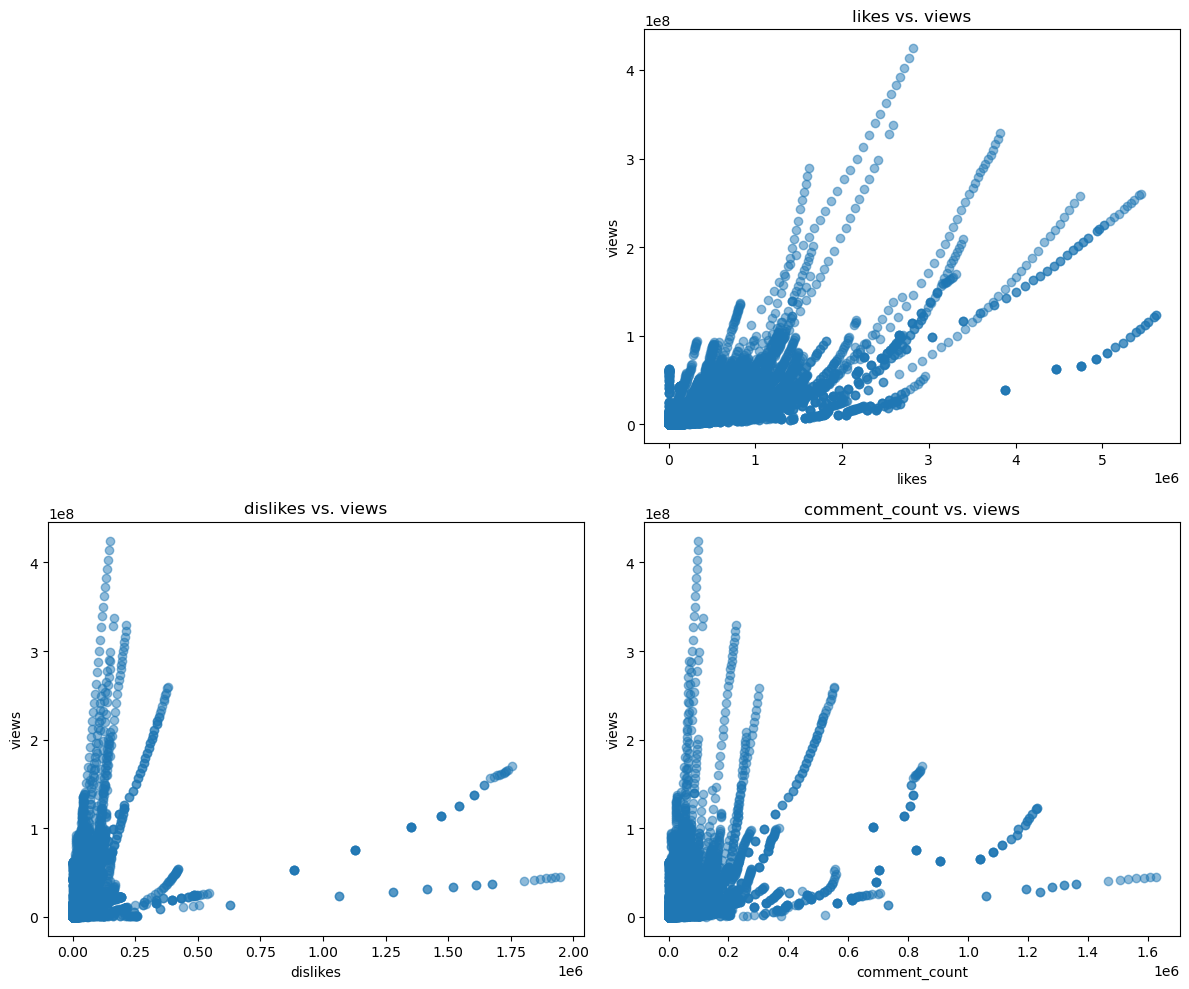

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']


# Scatter plots for each numerical column vs. 'views'
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    if column != 'views':
        plt.subplot(2, 2, i)
        plt.scatter(merged_df[column], merged_df['views'], alpha=0.5)
        plt.title(f'{column} vs. views')
        plt.xlabel(column)
        plt.ylabel('views')

plt.tight_layout()
plt.show()

## EDA for Numerical Variables

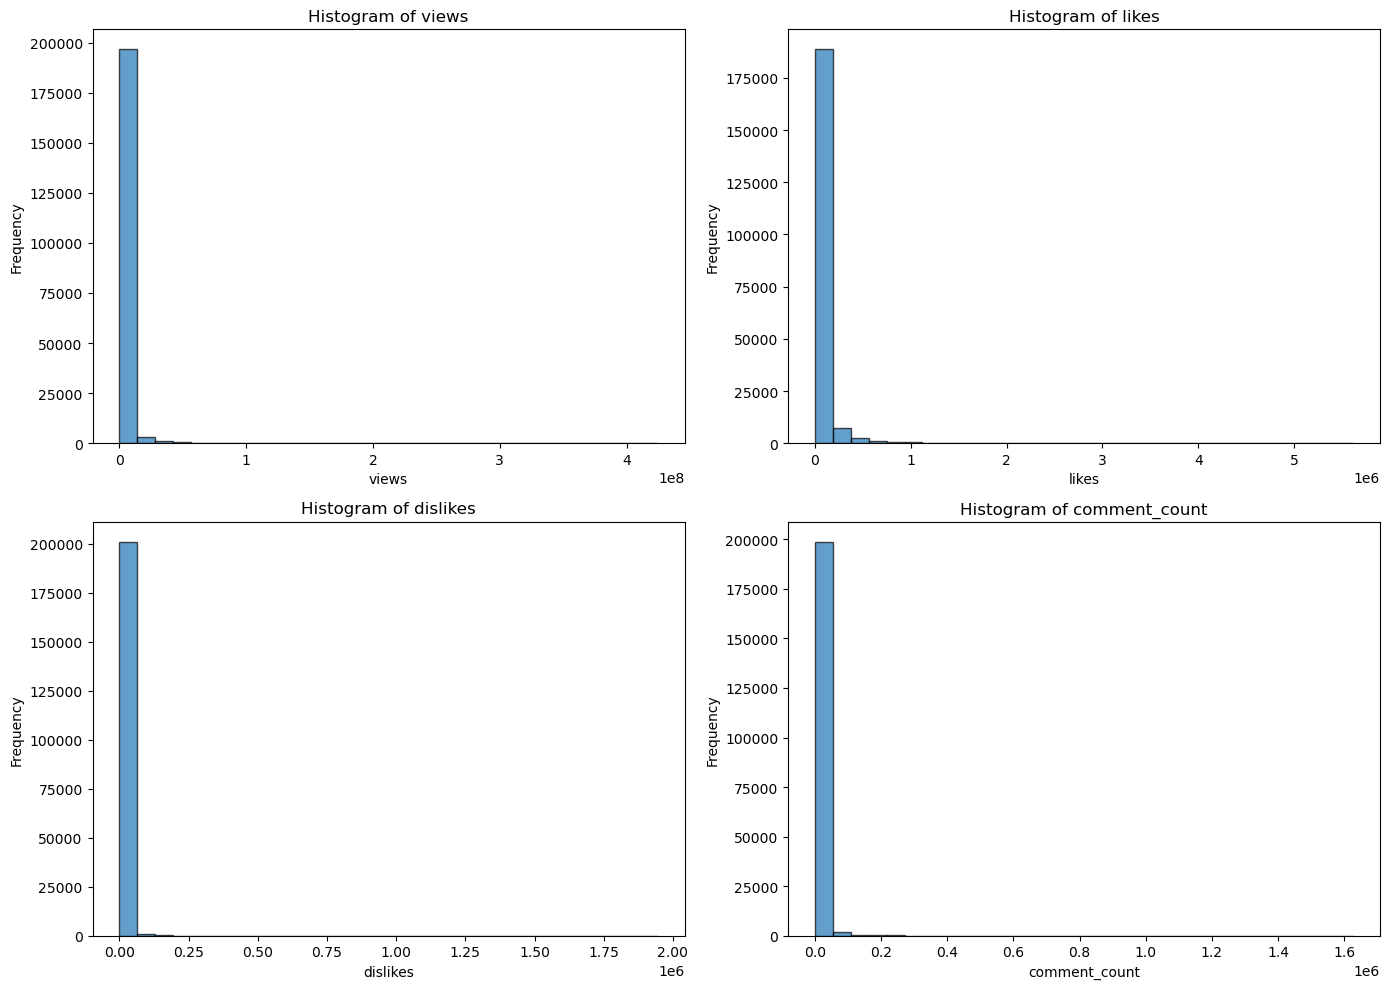

In [6]:
#data exploration for numerical columns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(merged_df[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EDA for Boolean Variables

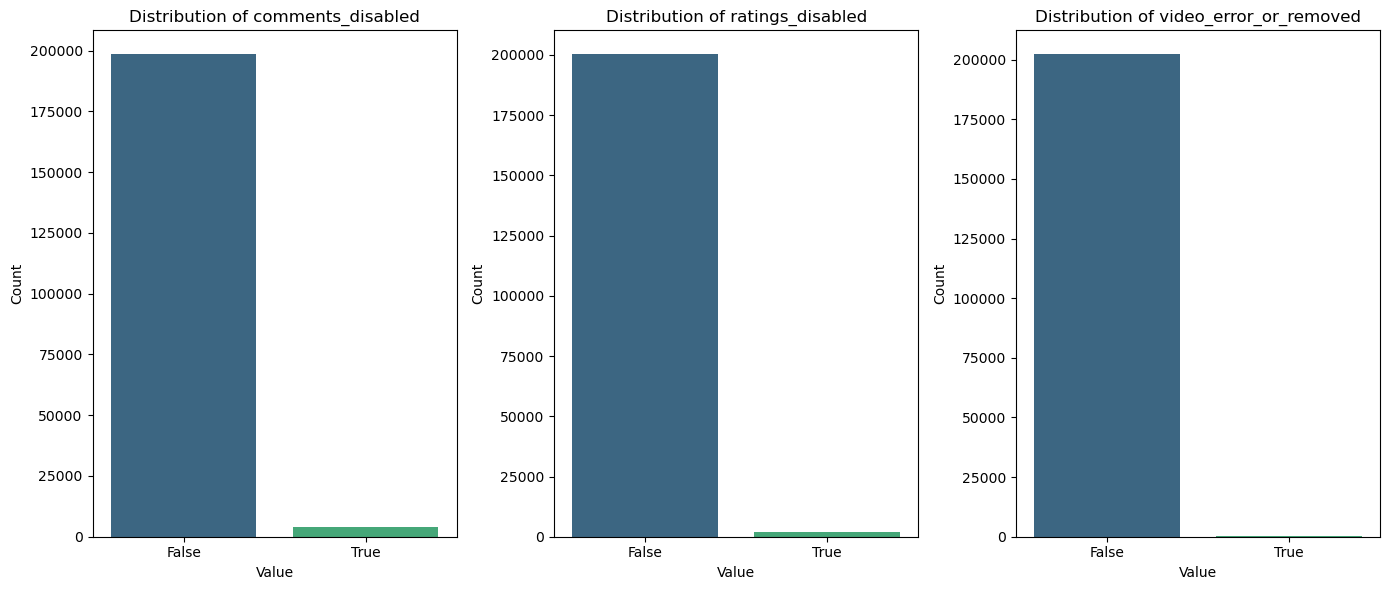

In [7]:
import seaborn as sns

# Define boolean columns
boolean_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Plot bar plots for each boolean column
plt.figure(figsize=(14, 6))
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(1, 3, i)
    # Count the occurrences of each boolean value
    counts = merged_df[column].value_counts()
    # Plot bar plot
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## EDA for Date-Time Variables

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_2436/1621989413.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')


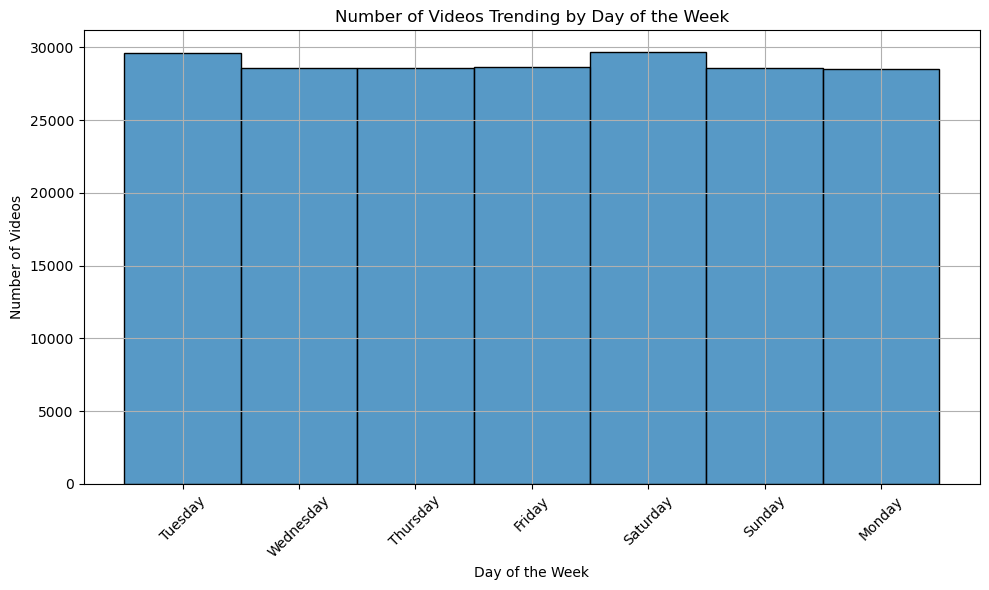

In [8]:
# convert the trending_date to datetime type
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m')
# Extract day of the week from 'trending_date'
merged_df['trending_day_of_week'] = merged_df['trending_date'].dt.day_name()

# Plot histogram of trending day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Trending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_2436/1346077495.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')


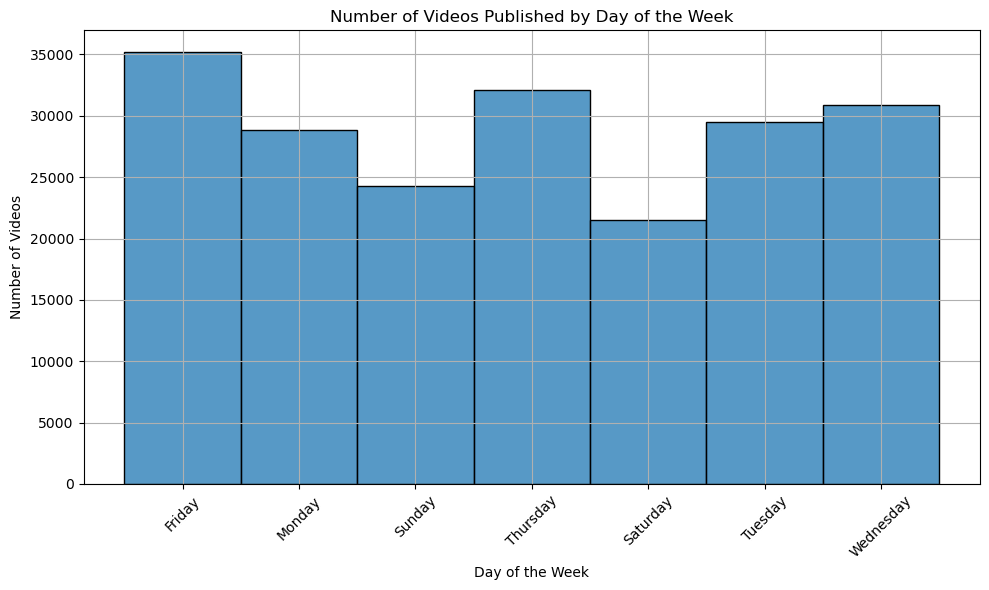

In [9]:
#convert the publish_date to datetime type
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# Extract day of the week from 'publish_time'
merged_df['day_of_week'] = merged_df['publish_time'].dt.day_name()

# Plot histogram of day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical Description

In [10]:
numerical_description = merged_df.describe()
print(numerical_description)

                       trending_date    category_id  \
count                         202310  202310.000000   
mean   2018-02-26 09:17:22.791755520      19.712412   
min              2017-11-14 00:00:00       1.000000   
25%              2018-01-03 00:00:00      17.000000   
50%              2018-02-25 00:00:00      23.000000   
75%              2018-04-23 00:00:00      24.000000   
max              2018-06-14 00:00:00      44.000000   
std                              NaN       7.359156   

                        publish_time         views         likes  \
count                         202310  2.023100e+05  2.023100e+05   
mean   2018-02-14 20:48:42.686629376  2.053181e+06  5.682284e+04   
min              2006-07-23 08:24:11  2.230000e+02  0.000000e+00   
25%              2017-12-30 04:30:01  7.517425e+04  1.447000e+03   
50%       2018-02-20 15:51:41.500000  3.091290e+05  7.603000e+03   
75%              2018-04-17 21:56:36  1.103690e+06  3.224475e+04   
max              2018-06-14 

In [11]:
# Statistical description of categorical columns
categorical_description = merged_df[['category_id', 'location']].describe()
print(categorical_description)

         category_id
count  202310.000000
mean       19.712412
std         7.359156
min         1.000000
25%        17.000000
50%        23.000000
75%        24.000000
max        44.000000


# Visualization for Categorical ID

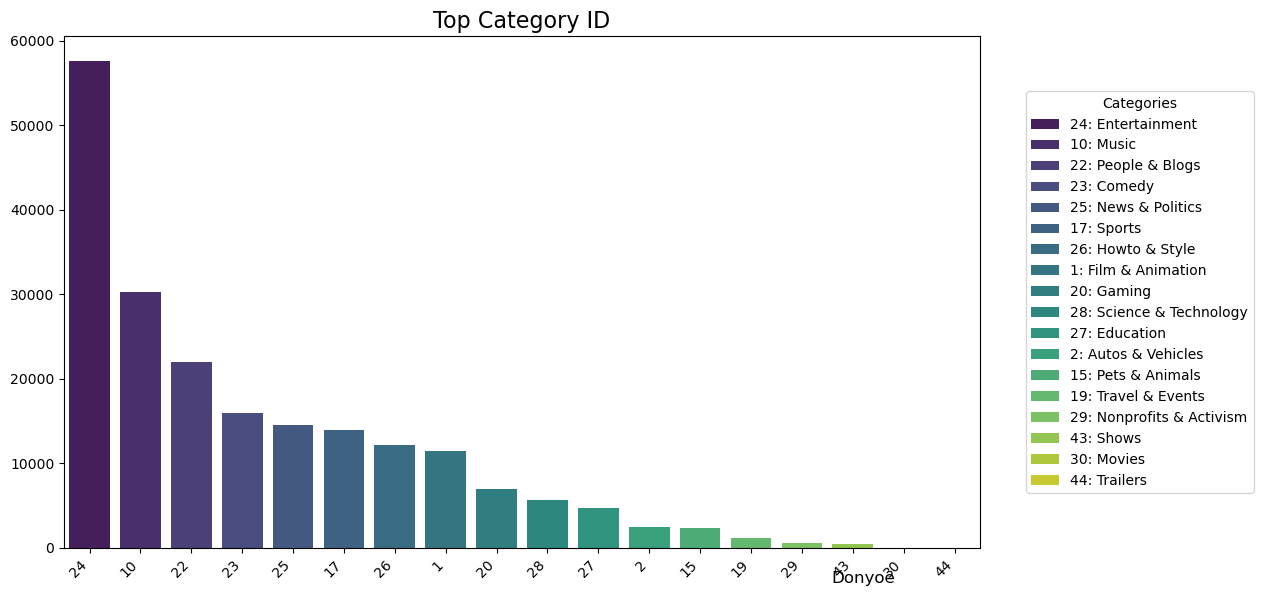

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'category_id' and count occurrences 
category_counts = merged_df.groupby('category_id').size().reset_index(name='N')

# Sort by 'N' in descending order
category_counts = category_counts.sort_values(by='N', ascending=False)
category_counts['category_id'] = pd.Categorical(category_counts['category_id'], categories=category_counts['category_id'], ordered=True)

# Create a dictionary to map 'category_id' to descriptive names
category_names = {
    1: "1: Film & Animation",
    2: "2: Autos & Vehicles",
    10: "10: Music",
    15: "15: Pets & Animals",
    17: "17: Sports",
    18: "18: Short Movies",
    19: "19: Travel & Events",
    20: "20: Gaming",
    21: "21: Videoblogging",
    22: "22: People & Blogs",
    23: "23: Comedy",
    24: "24: Entertainment",
    25: "25: News & Politics",
    26: "26: Howto & Style",
    27: "27: Education",
    28: "28: Science & Technology",
    29: "29: Nonprofits & Activism",
    30: "30: Movies",
    31: "31: Anime/Animation",
    32: "32: Action/Adventure",
    33: "33: Classics",
    34: "34: Comedy",
    35: "35: Documentary",
    36: "36: Drama",
    37: "37: Family",
    38: "38: Foreign",
    39: "39: Horror",
    40: "40: Sci-Fi/Fantasy",
    41: "41: Thriller",
    42: "42: Shorts",
    43: "43: Shows",
    44: "44: Trailers"
}

# Map 'category_id' to names in the 'category_counts' DataFrame
category_counts['category_name'] = category_counts['category_id'].map(category_names)

# Plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_counts, x='category_id', y='N', palette='viridis')  # Assign to 'barplot'

# Customize the plot to match your ggplot2 example
plt.title("Top Category ID", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.figtext(0.9, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Add a custom legend for category names on the side
handles = barplot.patches
legend_labels = [category_names[int(c)] for c in category_counts['category_id']]

# Position the legend on the right of the plot using 'bbox_to_anchor'
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, title='Categories',
           bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

plt.show()

# Data Transformation-Create Engagement Metrics

In [13]:
# Create a new column
merged_df['Engagement Metrics'] = merged_df['likes'] + merged_df['dislikes'] + merged_df['comment_count']
# Display the DataFrame to check the new column
print(merged_df[['likes', 'dislikes', 'comment_count', 'Engagement Metrics']].head())

     likes  dislikes  comment_count  Engagement Metrics
0   787425     43420         125882              956727
1   127794      1688          13030              142512
2   146035      5339           8181              159555
3   132239      1989          17518              151746
4  1634130     21082          85067             1740279


# Visualization-Engagement Metrics

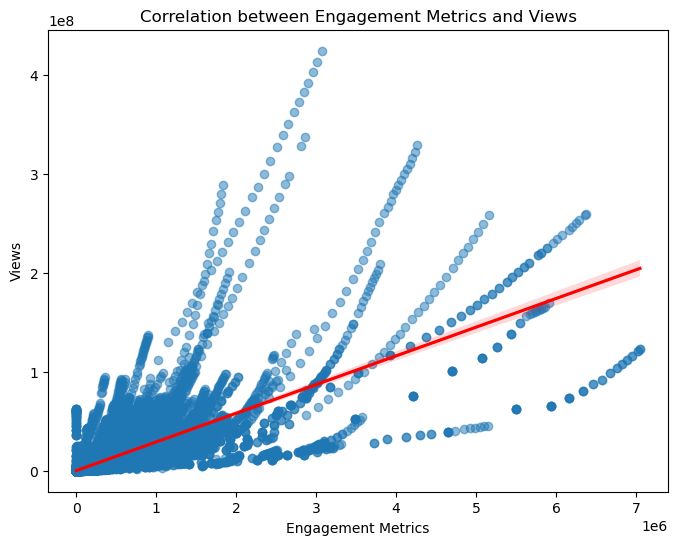

In [14]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Engagement Metrics', y='views', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Engagement Metrics and Views')
plt.xlabel('Engagement Metrics')
plt.ylabel('Views')
plt.show()

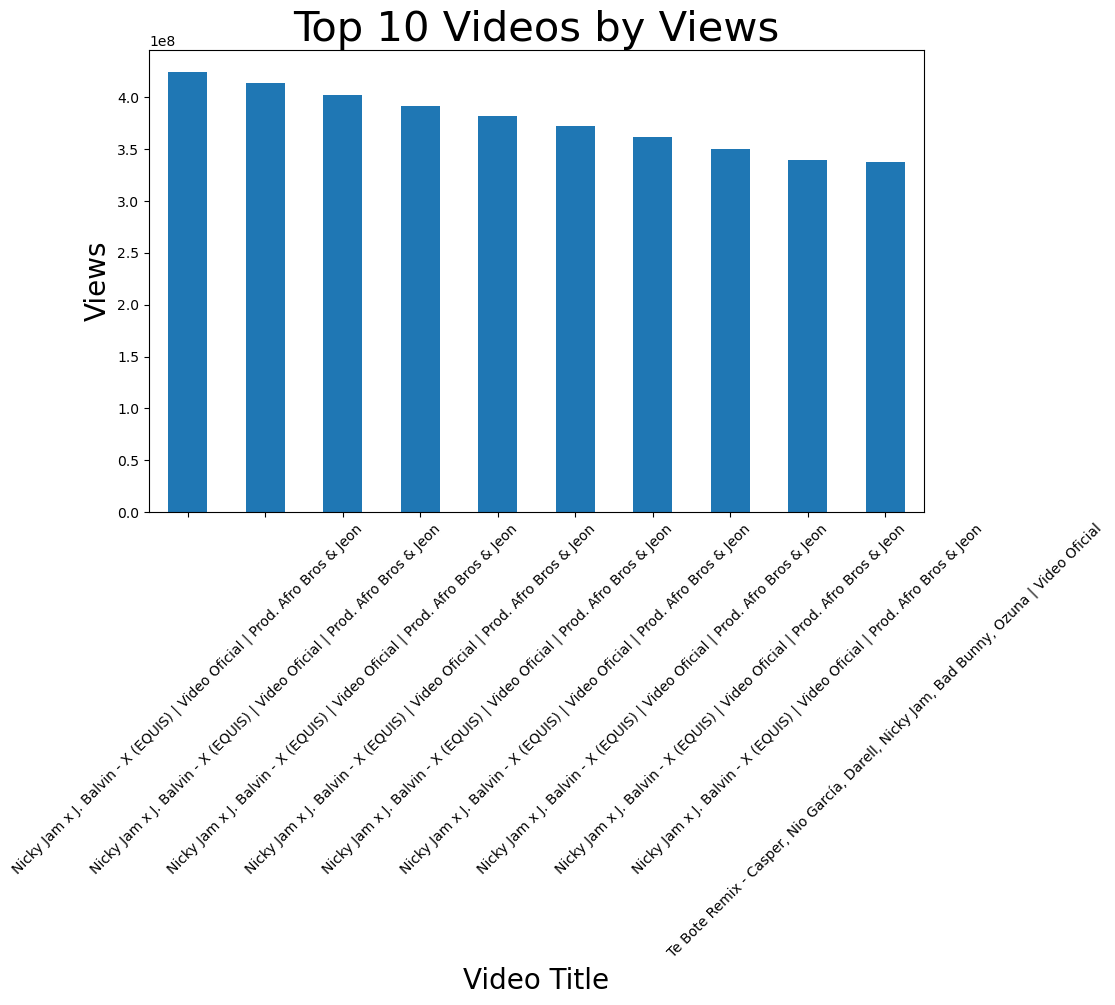

In [15]:
top_videos = merged_df.nlargest(10, 'views')[['title', 'views']]


top_videos.set_index('title')['views'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Video Title',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.title('Top 10 Videos by Views',fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Engagement metrics for top 50 videos
top_50_videos = merged_df.nlargest(50, 'views')
print(top_50_videos[['title', 'Engagement Metrics','location']])

                                                    title  Engagement Metrics  \
150857  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3067426   
150657  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3011515   
150453  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2956724   
150256  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2902891   
150060  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2845332   
149869  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2786627   
149686  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2723032   
149497  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2650114   
149306  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2582218   
156905  Te Bote Remix - Casper, Nio García, Darell, Ni...             2862074   
147990               Bad Bunny - Amorfoda | Video Oficial             4264625   
156737  Te Bote Remix - Casp

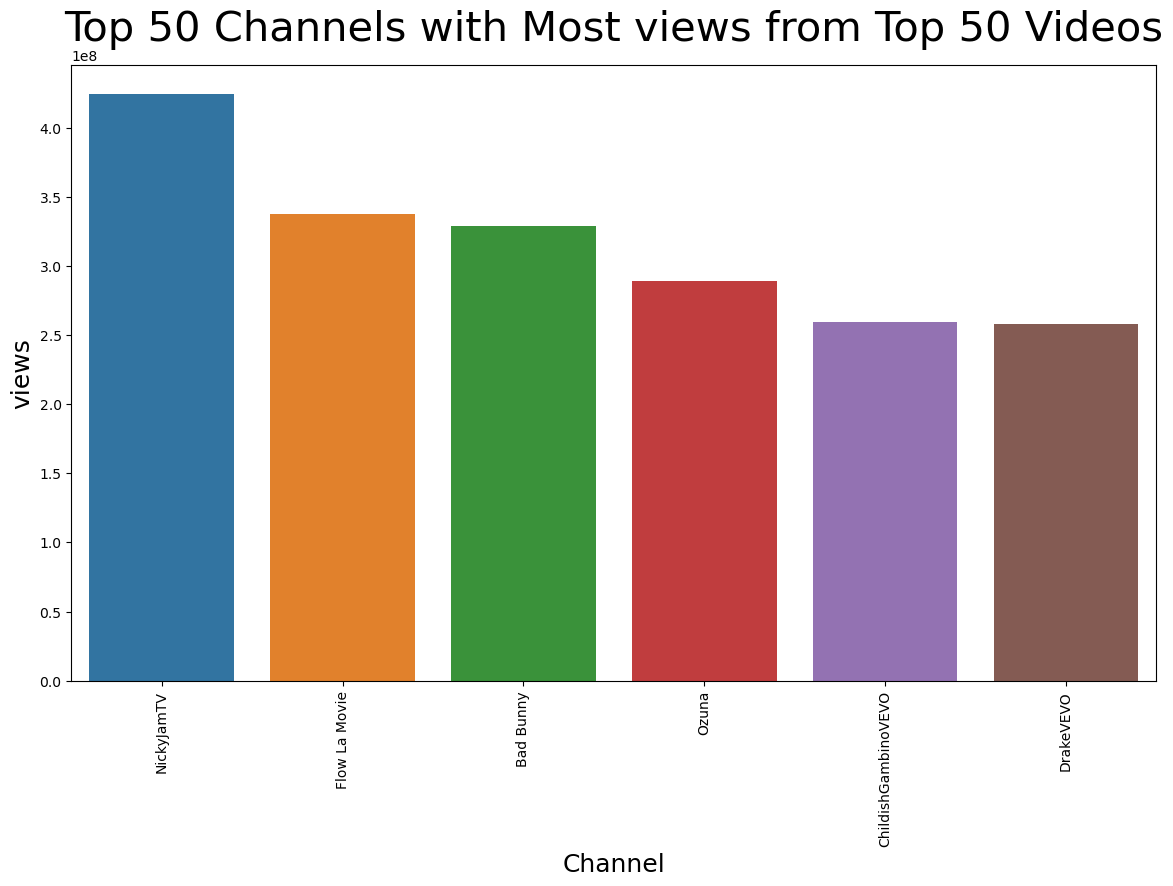

In [17]:
import seaborn as snb
content = top_50_videos.groupby('channel_title')['views'].max()

# Sort values to get the top 50 channels with the most views
content = content.sort_values(ascending=False).head(50)
content = content.reset_index()  # Convert index to column

# Plotting the results
plt.figure(figsize=(14, 8))
snb.barplot(x='channel_title', y='views', data=content)
plt.title('Top 50 Channels with Most views from Top 50 Videos', fontsize=30)
plt.ylabel('views', fontsize=18)
plt.xlabel('Channel', fontsize=18)
plt.xticks(rotation=90)
plt.show()

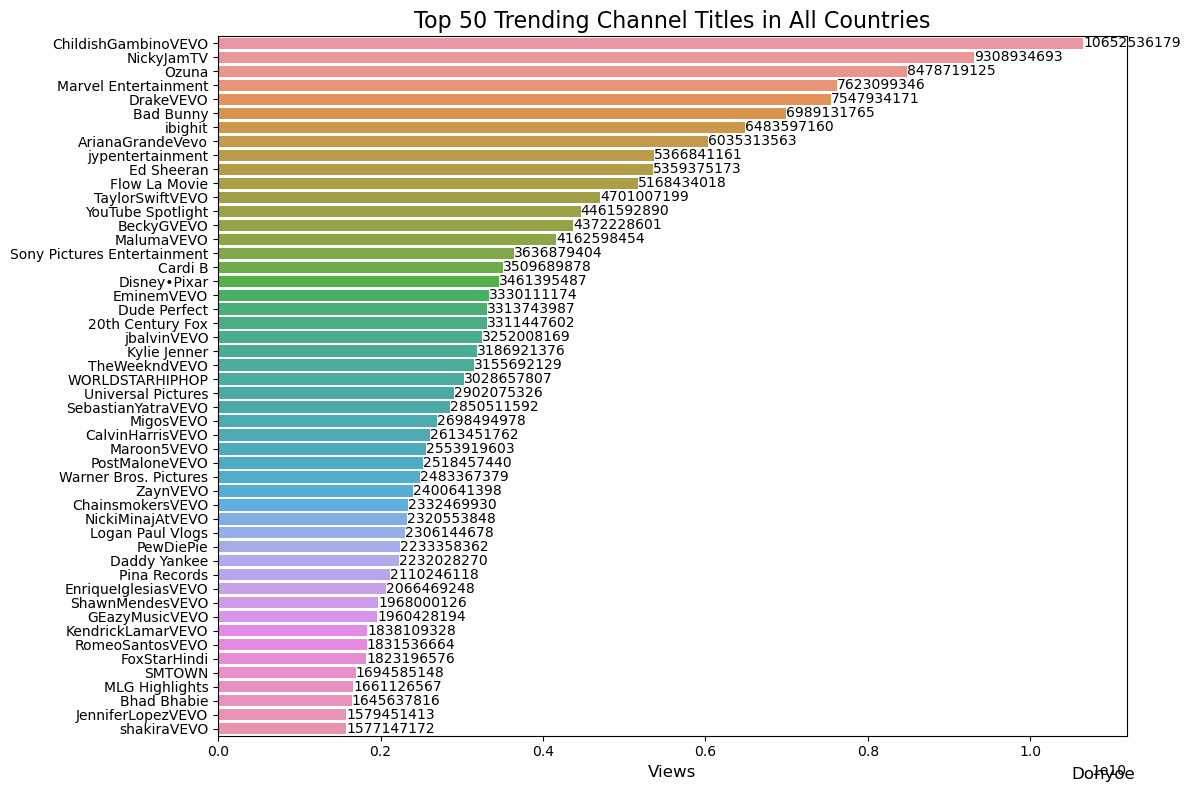

In [18]:
channel_counts = merged_df.groupby('channel_title')['views'].sum().reset_index()

# Sort values and select top 10 channels
top_10_channels = channel_counts.sort_values(by='views', ascending=False).head(50)

# Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='views', y='channel_title', data=top_10_channels,orient='h')

# Add labels
for index, value in enumerate(top_10_channels['views']):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

# Customize the plot
plt.title('Top 50 Trending Channel Titles in All Countries', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel(None)
plt.xticks(rotation=0)  # x-axis ticks don't need rotation in horizontal bar plot
plt.tight_layout()

# Add caption
plt.figtext(0.95, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

# Normalize and Standardize Data

### Correlation Metrics for Variables

                  views     likes  dislikes  comment_count
views          1.000000  0.784467  0.415790       0.501928
likes          0.784467  1.000000  0.454301       0.780923
dislikes       0.415790  0.454301  1.000000       0.727815
comment_count  0.501928  0.780923  0.727815       1.000000


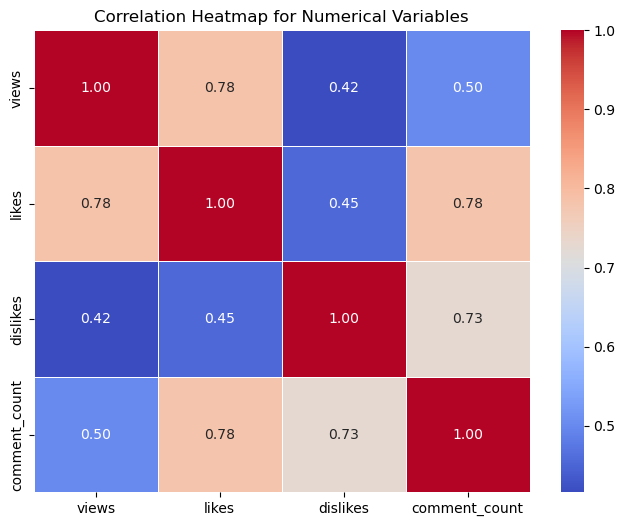

In [19]:
# add category_id to numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count', ]

# Compute the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

### Assign Score for Numerical Values

In [20]:
import pandas as pd

# Assuming the correlation values are manually entered from the heatmap
correlation_values = {
    'likes': 0.784,          # Correlation of likes with views
    'dislikes': 0.416,       # Correlation of dislikes with views
    'comment_count': 0.502 # Correlation of comment_count with views
}

# Convert the correlation values to absolute values
abs_correlations = {key: abs(value) for key, value in correlation_values.items()}

# Calculate the total sum of absolute correlations
total_correlation = sum(abs_correlations.values())

# Calculate weights by normalizing the absolute correlation values
weights = {key: value / total_correlation for key, value in abs_correlations.items()}

# Convert the weights to a DataFrame for better visualization
weights_df = pd.DataFrame(list(weights.items()), columns=['Variable', 'Weight'])

# Display the weights
print("Calculated Weights of Independent Variables Relative to 'Views':")
print(weights_df)

Calculated Weights of Independent Variables Relative to 'Views':
        Variable    Weight
0          likes  0.460635
1       dislikes  0.244418
2  comment_count  0.294947


In [21]:
import pandas as pd

weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count'] 
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

df_sorted = merged_df.sort_values(by='rank')

print(df_sorted)

#output_filename = 'ranked_videos_combined.csv'
#df_sorted.to_csv(output_filename, index=False)

#print("Listing of Every Video with Individual Scores and Ranks Across All Locations:")
#print(df_sorted[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'category_id', 'location', 'score', 'rank']])
#print(f"\nThe ranking of all videos from all locations has been saved to '{output_filename}'.")


           video_id trending_date                                  title  \
159083  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
199634  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
158913  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
199433  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
158733  7C2z4GqqS5E    2018-05-30    BTS (방탄소년단) 'FAKE LOVE' Official MV   
...             ...           ...                                    ...   
131591  LFhT6H6pRWg    2017-12-29  PSA from Chairman of the FCC Ajit Pai   
131799  LFhT6H6pRWg    2017-12-30  PSA from Chairman of the FCC Ajit Pai   
132020  LFhT6H6pRWg    2017-12-31  PSA from Chairman of the FCC Ajit Pai   
132222  LFhT6H6pRWg    2018-01-01  PSA from Chairman of the FCC Ajit Pai   
132430  LFhT6H6pRWg    2018-01-02  PSA from Chairman of the FCC Ajit Pai   

       channel_title  category_id        publish_time  \
159083       ibighit          

### EDA for Score for Top 50 Channels

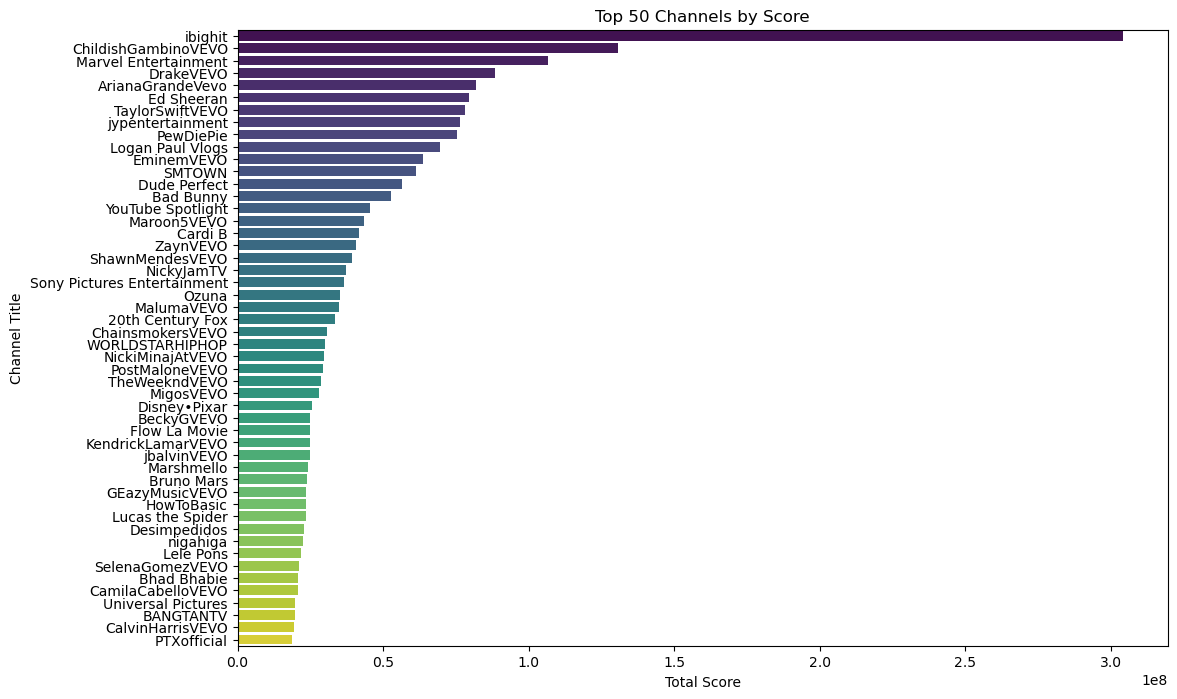

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'train'
weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

# Calculate score and rank
merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count']
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

# Group by channel_title and sum the scores
channel_scores = merged_df.groupby('channel_title')['score'].sum().reset_index()

# Sort by total score and get top 50 channels
top_channels = channel_scores.sort_values(by='score', ascending=False).head(50)

# Create a bar plot for the top 50 channels
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='channel_title', data=top_channels, palette='viridis')
plt.title('Top 50 Channels by Score')
plt.xlabel('Total Score')
plt.ylabel('Channel Title')
plt.show()

# Create Word Cloud

### Video Titles

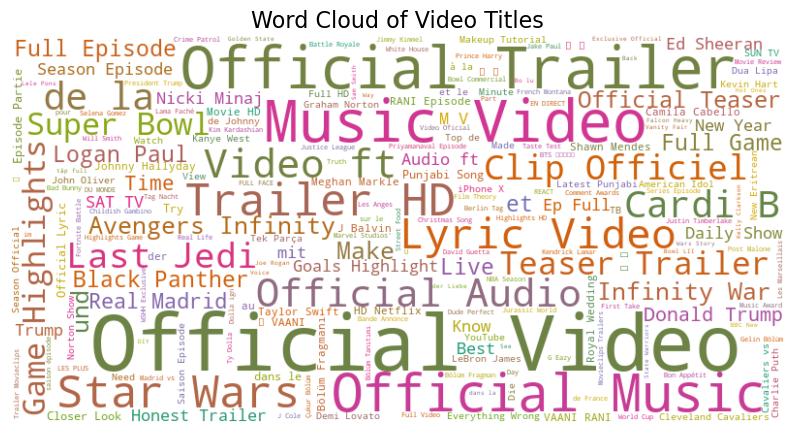

In [23]:
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_6

# Assuming your DataFrame is named 'mergeda_df'
# Concatenate all titles into a single string
all_titles = " ".join(merged_df['title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Titles', fontsize=16)
plt.show()

### Channel Titles

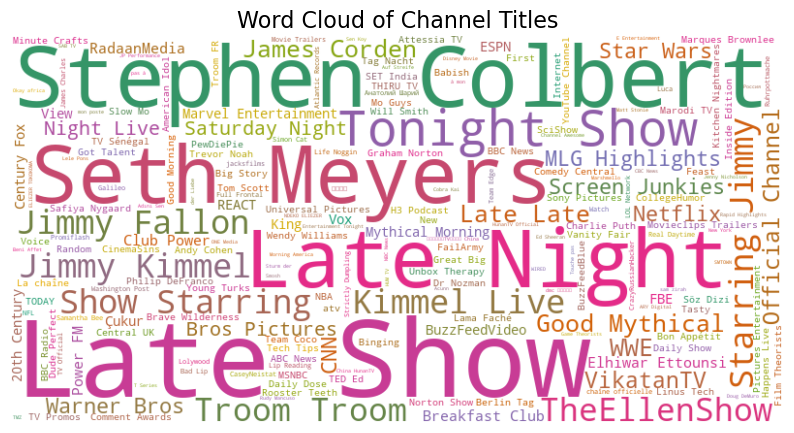

In [24]:
all_channel_titles = " ".join(merged_df['channel_title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_channel_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Channel Titles', fontsize=16)
plt.show()

### Video Tags

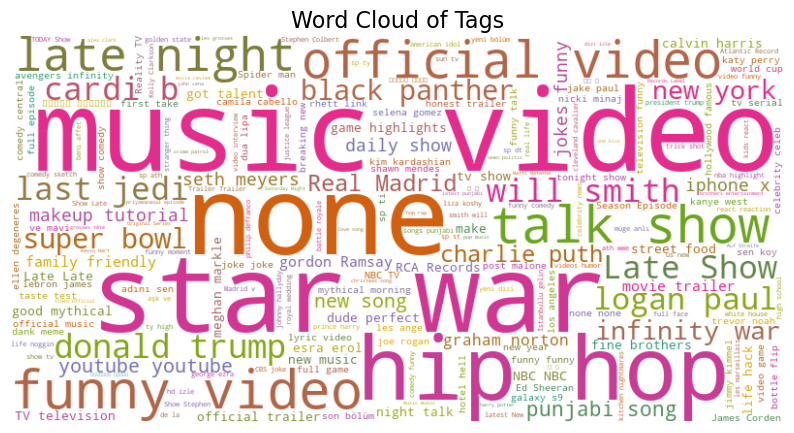

In [25]:
# Creating Word Cloud-tags
all_tags = " ".join(merged_df['tags'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_tags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Tags', fontsize=16)
plt.show()

### Video Descriptions

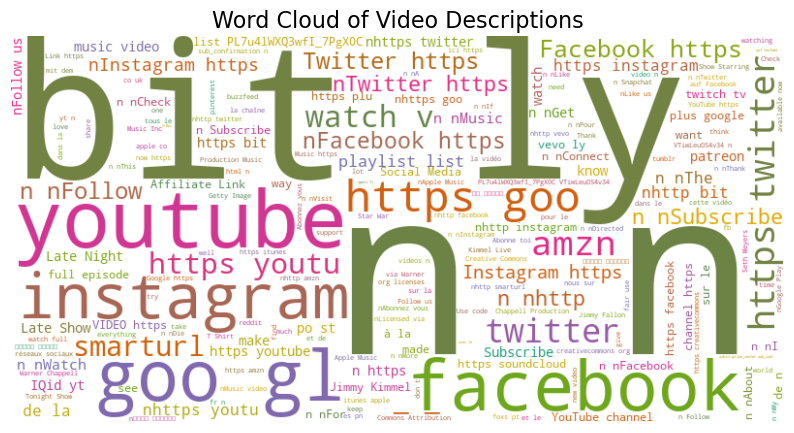

In [26]:
all_description = " ".join(merged_df['description'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_description)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Descriptions', fontsize=16)
plt.show()

# Drop Unnecessary Columns

In [27]:
#drop columns needed
merged_df.drop(columns=['thumbnail_link', 'video_id','comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)

print(merged_df.head())

  trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id        publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03   
1     iDubbbzTV           23 2017-11-13 17:00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24   
3      nigahiga           24 2017-11-12 18:01:41   
4    Ed Sheeran           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king

# Text Preprocessing 

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Get the list of default English stopwords
stop_words = set(stopwords.words('english'))
stop_words = set(stopwords.words('chinese'))
stop_words = set(stopwords.words('french'))
stop_words = set(stopwords.words('german'))

# Function to remove stopwords and clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove non-alphabetical characters (retain only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    remove_stopwords = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a string
    new_text = ' '.join(remove_stopwords)
    
    return new_text
    data = {'title','description','text'}
    
# Apply the clean_text function to the 'title' column in merged_df1
merged_df['new_text'] = merged_df['title'].apply(clean_text)

# Display the cleaned DataFrame
print(merged_df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuhanzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       trending_date                                              title  \
0         2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1         2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2         2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3         2017-11-14                           I Dare You: GOING BALD!?   
4         2017-11-14        Ed Sheeran - Perfect (Official Music Video)   
...              ...                                                ...   
202305    2018-06-14                       The Cat Who Caught the Laser   
202306    2018-06-14                         True Facts : Ant Mutualism   
202307    2018-06-14  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
202308    2018-06-14                How Black Panther Should Have Ended   
202309    2018-06-14  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title  category_id        publish_time  \
0                     EminemVE

In [29]:
# Check the data types of each column
print(merged_df.dtypes)

trending_date           datetime64[ns]
title                           object
channel_title                   object
category_id                      int64
publish_time            datetime64[ns]
tags                            object
views                            int64
likes                            int64
dislikes                         int64
comment_count                    int64
description                     object
location                        object
trending_day_of_week            object
day_of_week                     object
Engagement Metrics               int64
score                          float64
rank                           float64
new_text                        object
dtype: object


# Split the Dataset into Train and Test by 80/20

In [30]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['views'])  # Drop 'views' from features to get X
y = merged_df['views']
# Assuming you have a dataset with features X and target y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

train = pd.DataFrame(X_train)
train['views'] = y_train.values

test = pd.DataFrame(X_test)
test['views'] = y_test.values